In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
prefix = "20160223_10_equil_fixI0"

input_no2 = "../DOAS/#{prefix}_NO2.csv"
input_nox = "../DOAS/#{prefix}_NOx.csv"

nil

# Data preparation

In [3]:
no2 = DataFrame.from_csv(input_no2)
no2.vectors = Index.new(no2.vectors.to_a.map{|i| i.to_sym})
no2.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.0169069148838716,0.234338924916043,-800694.773159439,2223872.54307379,0,0.420808440310092,0.156620421369506,-358.513014412249,2776.9583432717,2016-02-23T02:55:44+01:00
1,0.0512057604706988,0.235216868197584,-6030479.4241629,2263768.89660149,1,1.36067046222421,0.159605711530508,-501.42580968216,2824.18599525881,2016-02-23T02:55:57+01:00
2,-0.0183086711467912,0.218207731376029,-5939766.86397417,2131787.85764927,2,1.36166394195707,0.150284627326935,-38.7324493209712,2657.23963056307,2016-02-23T02:56:08+01:00
3,0.0722535895007897,0.244718306764385,-3858138.5669934,2322041.95858671,3,1.31638113326758,0.163720695393168,-634.595170361324,2899.50646260479,2016-02-23T02:56:19+01:00
4,0.00386808277239366,0.224904692506407,-4721081.49492486,2134243.92498738,4,1.24600130552246,0.150466306912196,-711.956964839769,2664.95871781155,2016-02-23T02:56:31+01:00
5,-0.114798077881723,0.232721760773747,-6601878.20370177,2236147.42614514,5,1.33944729587114,0.157655300285542,25.0423122863443,2789.99715541276,2016-02-23T02:56:42+01:00
6,-0.0967458703266748,0.228012348629941,-3116129.90433327,2163552.36312045,6,1.35710610486126,0.152553931502772,-775.459008707539,2701.59130451589,2016-02-23T02:56:53+01:00
7,0.0282667448093293,0.236145847804547,-4743744.69443031,2266883.93139099,7,1.32662050482102,0.159820799865913,-332.544778273647,2828.48283066337,2016-02-23T02:57:04+01:00
8,-0.047740397666686,0.223565089413629,-5943756.26369764,2164771.22605728,8,1.31267473552912,0.152613179791482,46.6421648997928,2699.75789929911,2016-02-23T02:57:15+01:00
9,0.140076295501731,0.231078258977395,-3771492.4754521,2252885.34018632,9,1.28892579004034,0.158809950987399,-477.333959490251,2808.56012762453,2016-02-23T02:57:26+01:00


In [4]:
nox = DataFrame.from_csv(input_nox)
nox.vectors = Index.new(nox.vectors.to_a.map{|i| i.to_sym})
nox.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.190434939307471,0.239462778764996,-3657798.16254235,2281454.00956042,29,13.1102482692574,0.163401717032152,758.946180730748,2846.84116505553,2016-02-23T03:01:21+01:00
1,0.373820453238301,0.272810157075354,-5381151.79688918,2600958.88254994,30,26.9901524112233,0.190176149503224,2393.45029395989,3243.70902291023,2016-02-23T03:01:32+01:00
2,0.18388119558772,0.255248158681768,-3854098.57156391,2434056.77266401,31,26.9546135214718,0.178109887592722,2590.37664994359,3035.47368175682,2016-02-23T03:01:42+01:00
3,0.33665495283707,0.268062990334591,-4628251.53647952,2555846.15071433,32,27.0596338010439,0.187052113753489,2292.96662954904,3187.3721314744,2016-02-23T03:01:52+01:00
4,0.156696217845894,0.256833200566514,-3935269.21846004,2446495.31603828,33,27.1341097608565,0.179072839254354,2575.24522926418,3051.17111588845,2016-02-23T03:02:02+01:00
5,0.36409572869238,0.284098623252313,-5475314.09448208,2707491.00698126,34,26.8978261737992,0.198103947772454,2407.71688232907,3376.59567706851,2016-02-23T03:02:13+01:00
6,0.273425889353493,0.256285541096152,-4361657.00091109,2444518.91069289,35,27.090249447686,0.178911160153651,2216.00574051192,3048.45793269968,2016-02-23T03:02:23+01:00
7,0.340646549533078,0.266660098295855,-5279401.13459122,2542143.0730209,36,27.0001372896957,0.186032825681523,2849.23108553705,3170.31796839529,2016-02-23T03:02:33+01:00
8,0.200649639090297,0.256386908854197,-4020972.20296207,2443072.39507152,37,27.1813066258323,0.178832867638188,2369.19145859593,3046.86016412062,2016-02-23T03:02:43+01:00
9,0.3494615938001,0.284511078416929,-4272413.11754375,2711203.22963607,38,27.1019571881606,0.198438121832095,2385.39543654088,3381.20986274199,2016-02-23T03:02:54+01:00


In [5]:
ts = no2.concat(nox)
ts.sort([:timestamp])

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.0169069148838716,0.234338924916043,-800694.773159439,2223872.54307379,0,0.420808440310092,0.156620421369506,-358.513014412249,2776.9583432717,2016-02-23T02:55:44+01:00
1,0.0512057604706988,0.235216868197584,-6030479.4241629,2263768.89660149,1,1.36067046222421,0.159605711530508,-501.42580968216,2824.18599525881,2016-02-23T02:55:57+01:00
2,-0.0183086711467912,0.218207731376029,-5939766.86397417,2131787.85764927,2,1.36166394195707,0.150284627326935,-38.7324493209712,2657.23963056307,2016-02-23T02:56:08+01:00
3,0.0722535895007897,0.244718306764385,-3858138.5669934,2322041.95858671,3,1.31638113326758,0.163720695393168,-634.595170361324,2899.50646260479,2016-02-23T02:56:19+01:00
4,0.00386808277239366,0.224904692506407,-4721081.49492486,2134243.92498738,4,1.24600130552246,0.150466306912196,-711.956964839769,2664.95871781155,2016-02-23T02:56:31+01:00
5,-0.114798077881723,0.232721760773747,-6601878.20370177,2236147.42614514,5,1.33944729587114,0.157655300285542,25.0423122863443,2789.99715541276,2016-02-23T02:56:42+01:00
6,-0.0967458703266748,0.228012348629941,-3116129.90433327,2163552.36312045,6,1.35710610486126,0.152553931502772,-775.459008707539,2701.59130451589,2016-02-23T02:56:53+01:00
7,0.0282667448093293,0.236145847804547,-4743744.69443031,2266883.93139099,7,1.32662050482102,0.159820799865913,-332.544778273647,2828.48283066337,2016-02-23T02:57:04+01:00
8,-0.047740397666686,0.223565089413629,-5943756.26369764,2164771.22605728,8,1.31267473552912,0.152613179791482,46.6421648997928,2699.75789929911,2016-02-23T02:57:15+01:00
9,0.140076295501731,0.231078258977395,-3771492.4754521,2252885.34018632,9,1.28892579004034,0.158809950987399,-477.333959490251,2808.56012762453,2016-02-23T02:57:26+01:00


In [6]:
ts[:timestamp].head

#<Daru::Vector:12735840 @name = nil @size = 10 >
                                      nil
                   0 2016-02-23T02:55:44+
                   1 2016-02-23T02:55:57+
                   2 2016-02-23T02:56:08+
                   3 2016-02-23T02:56:19+
                   4 2016-02-23T02:56:31+
                   5 2016-02-23T02:56:42+
                   6 2016-02-23T02:56:53+
                   7 2016-02-23T02:57:04+
                   8 2016-02-23T02:57:15+
                   9 2016-02-23T02:57:26+

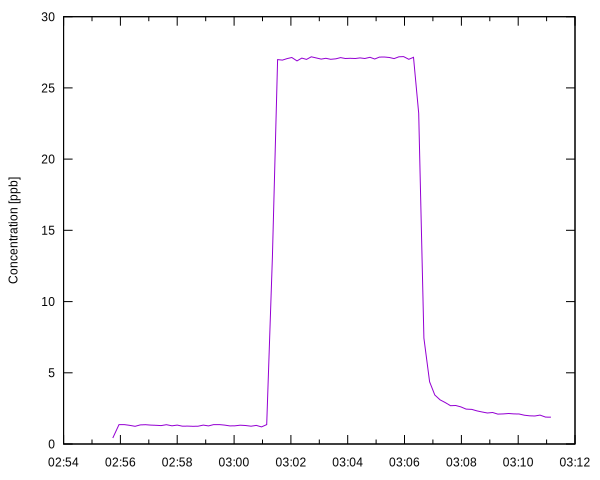

In [7]:
ts.index = DateTimeIndex.new(ts[:timestamp])

Plot.new(
  [ts[:no2], with: "lines", title: ""],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

In [8]:
offset = ts[:timestamp].first

ts[:s] = ts[:timestamp].collect do |t|
  (t - offset).to_f*24*60*60
end
ts.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
2016-02-23T02:55:44+01:00,0.0169069148838716,0.234338924916043,-800694.773159439,2223872.54307379,0,0.420808440310092,0.156620421369506,-358.513014412249,2776.9583432717,2016-02-23T02:55:44+01:00,0.0
2016-02-23T02:55:57+01:00,0.0512057604706988,0.235216868197584,-6030479.4241629,2263768.89660149,1,1.36067046222421,0.159605711530508,-501.42580968216,2824.18599525881,2016-02-23T02:55:57+01:00,13.0
2016-02-23T02:56:08+01:00,-0.0183086711467912,0.218207731376029,-5939766.86397417,2131787.85764927,2,1.36166394195707,0.150284627326935,-38.7324493209712,2657.23963056307,2016-02-23T02:56:08+01:00,23.999999999999996
2016-02-23T02:56:19+01:00,0.0722535895007897,0.244718306764385,-3858138.5669934,2322041.95858671,3,1.31638113326758,0.163720695393168,-634.595170361324,2899.50646260479,2016-02-23T02:56:19+01:00,35.0
2016-02-23T02:56:31+01:00,0.00386808277239366,0.224904692506407,-4721081.49492486,2134243.92498738,4,1.24600130552246,0.150466306912196,-711.956964839769,2664.95871781155,2016-02-23T02:56:31+01:00,47.0
2016-02-23T02:56:42+01:00,-0.114798077881723,0.232721760773747,-6601878.20370177,2236147.42614514,5,1.33944729587114,0.157655300285542,25.0423122863443,2789.99715541276,2016-02-23T02:56:42+01:00,58.0
2016-02-23T02:56:53+01:00,-0.0967458703266748,0.228012348629941,-3116129.90433327,2163552.36312045,6,1.35710610486126,0.152553931502772,-775.459008707539,2701.59130451589,2016-02-23T02:56:53+01:00,69.00000000000001
2016-02-23T02:57:04+01:00,0.0282667448093293,0.236145847804547,-4743744.69443031,2266883.93139099,7,1.32662050482102,0.159820799865913,-332.544778273647,2828.48283066337,2016-02-23T02:57:04+01:00,80.00000000000001
2016-02-23T02:57:15+01:00,-0.047740397666686,0.223565089413629,-5943756.26369764,2164771.22605728,8,1.31267473552912,0.152613179791482,46.6421648997928,2699.75789929911,2016-02-23T02:57:15+01:00,90.99999999999999
2016-02-23T02:57:26+01:00,0.140076295501731,0.231078258977395,-3771492.4754521,2252885.34018632,9,1.28892579004034,0.158809950987399,-477.333959490251,2808.56012762453,2016-02-23T02:57:26+01:00,102.00000000000001


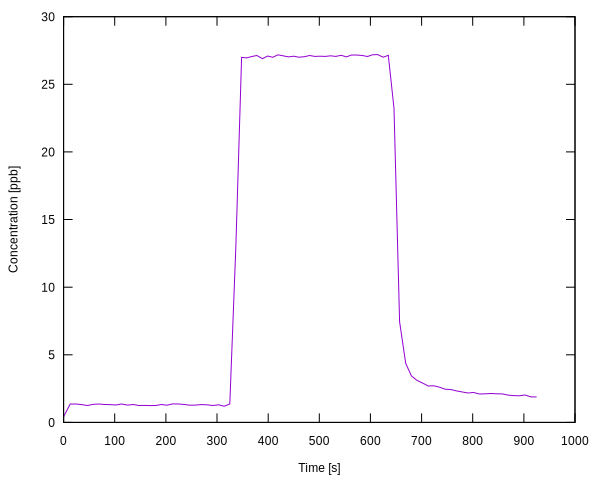

In [9]:


Plot.new(
  [ts[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [10]:
ts.index = Index.new((0..(ts.nrows - 1)).to_a)

ts.each_row_with_index do |row,i|
  if i+1 < ts.nrows and (row[:no2] - ts.row[i+1][:no2]).abs > 5
    puts i
    puts row[:no2]
  end 
end
nil

29
1.35863646537518
30
13.1102482692574
60
23.2195669499967


In [11]:
ts_fit = ts.row[60..(ts.nrows - 1)]
offset = ts_fit[:s].first
ts_fit[:s] = ts_fit[:s] - offset
ts_fit.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
60,0.241627241246993,0.242410848701354,-4871572.63573609,2310618.68546596,30,23.2195669499967,0.167897456820108,1037.97584994639,2882.11229272679,2016-02-23T03:06:30+01:00,0.0
61,0.0656245058860979,0.232832833786665,-4266967.55266327,2219893.87007736,31,7.43684537249075,0.157821010779902,-553.145152426035,2770.46511830399,2016-02-23T03:06:41+01:00,11.0
62,-0.0397504837709764,0.242140104195823,-7303010.39899477,2321938.39259001,32,4.36870475237162,0.164355651213323,-440.953722540894,2897.07839403651,2016-02-23T03:06:53+01:00,23.0
63,-0.0221121251593074,0.228884388973498,-4444511.76523291,2189286.9351569,33,3.4372170404429,0.154775894518313,-753.885768215101,2732.12281461647,2016-02-23T03:07:04+01:00,33.999999999999886
64,0.140166305300135,0.225278598327982,-4172568.96253917,2168945.2650964,34,3.10376897818587,0.153265024955544,-468.868253983207,2705.64828341545,2016-02-23T03:07:15+01:00,45.000000000000114
65,0.00795800844317637,0.217235411965334,-4915977.10844512,2077803.64171765,35,2.9053987898208,0.146792137990957,494.098702729196,2593.02664305555,2016-02-23T03:07:26+01:00,56.000000000000114
66,-0.0475796911814959,0.222983648717125,-4993491.02250885,2141359.73821225,36,2.69207966436419,0.151236448583434,-291.148782020918,2671.68019669298,2016-02-23T03:07:37+01:00,67.0
67,0.0343803236453279,0.228232153131206,-4192131.28170089,2198526.97950699,37,2.70573400292078,0.155274084520148,-868.168256208908,2742.53373975922,2016-02-23T03:07:48+01:00,78.0
68,0.0596664920701869,0.226654114216492,-4760457.46636225,2162788.46760882,38,2.60352582699442,0.152739632099479,-175.927766762106,2699.48562945336,2016-02-23T03:07:59+01:00,89.0
69,0.0999177604772562,0.237710868443577,-5297823.85808693,2255419.78379651,39,2.4514929035615,0.159256212573345,-386.766512717027,2816.19698940336,2016-02-23T03:08:10+01:00,100.00000000000011


In [12]:
plot_fit = Plot.new(
  [ts_fit[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")
nil

In [13]:
fit = fit(ts_fit[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 2, b: 20, t: 10, c: -0.001}, using: "2:3")
fit[:formula_ds].data

" 3.092 + -0.00488172*x + 20.0964*exp(-x/7.50505) "

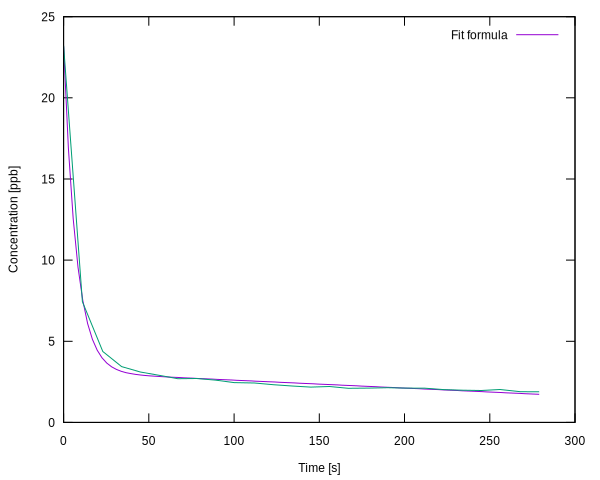

In [14]:
plot_fit << fit[:formula_ds]

In [15]:
ts_fit3 = ts.row[29..59]
ts_fit3[:s] -= ts_fit3[:s].first
plot_fit3 = Plot.new(
  [ts_fit3[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")
nil

In [16]:
fit3 = fit(ts_fit3[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit3[:formula_ds].data

" 27.223 + -26.6602*exp(-x/12.3235) "

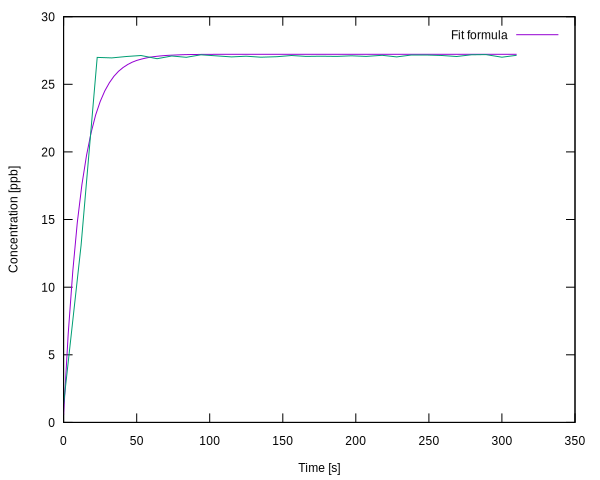

In [17]:
plot_fit3 << fit3[:formula_ds]

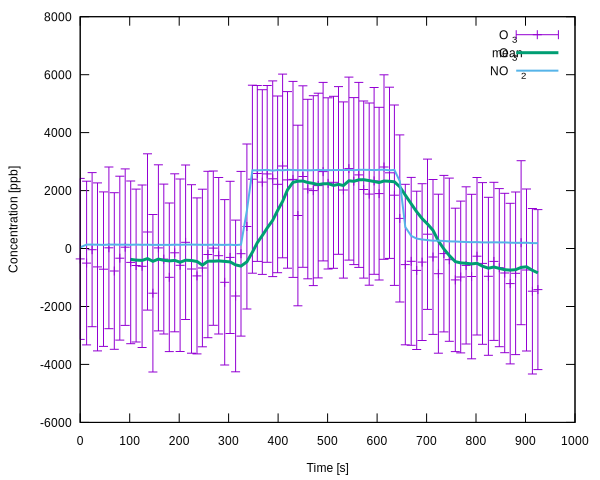

In [18]:
ts[:o3_mean] = ts[:o3].rolling_mean
ts[:no2_scaled] = ts[:no2]*100
Plot.new(
  [ts[:s, :o3, :o3_err], using: "2:3:4", with: "yerrorbars", title: "O_3"],
  [ts[:s, :o3_mean], using: "2:3", with: "lines", title: "O_3 mean", lw: "3"],
  [ts[:s, :no2_scaled], using: "2:3", with: "lines", title: "NO_2", lw: "2"],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [19]:
fit3[:coefficients]

{:a=>27.223, :b=>-26.6602, :t=>12.3235}

In [20]:
fit3[:deltas]

{:a=>0.2207, :b=>1.13, :t=>1.129}